<center> <h1><font size = 16>INFERENCIA ESTADÍSTICA</font></h1> </center>

<iframe width="560" height="315" src="https://www.youtube.com/embed/hRAFPdDppzs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

https://www.youtube.com/embed/hRAFPdDppzs

<h2>Algunos conceptos preliminares</h2>

Generalmente, contamos con pocos recursos (ya sea tiempo o dinero). Estas limitaciones no permiten que un censo se realice con frecuencia; por lo tanto, requerimos de trabajar con una muestra y calcular los parámetros poblacionales a partir de una muestra. Por consiguiente, debemos tener claras algunas definiciones:

* **Poblacion**: Son cada unas de las variables que se definen sobre un universo. Mediante esta definición puede hacerse notar que puede existir más de una población asociada a un mismo universo.
* **Muestra**: Es una parte representativa de la población.

Pero, veamos un ejemplo para aclarar esto. Importaremos un conjunto de dato que contiene información sobre ventas de una firma específica en EEUU:

In [ ]:
# Si necesitamos determinar cuál es el directorio de trabajo
# getwd()

In [ ]:
# Para descarga el archivo en el directorio de trabajo
# El primer argumento corresponde al enlace de descarga directa y el segundo al nombre asignado al archivo tras la descarga
#download.file('url')

In [ ]:
# Librerias necesarias para el ejercicio
# install.packages(c('readxl','readr','dplyr','ggplot2',
#                  'samplingbook', 'boot, 'bbmle', 'TeachingDemos',
#                  'descr'))
# devtools::install_github('fhernanb/stests', force=TRUE)

Primero, importemos los datos (previamente cargados los archivos en el directorio de trabajo). Primero, archivos de Excel:

In [ ]:
library(readxl)
producto <- read_excel("Data/bi_dimensions.xlsx", 
                       sheet = "product",
                       col_types = c("text","text",
                                     "text", "text", "numeric"),
                       skip = 1)
df.producto <- data.frame(producto)
print(head(df.producto))

In [ ]:
geo <- read_excel("Data/bi_dimensions.xlsx", sheet = "geo",
                  skip = 3)
df.geo <- data.frame(geo)
print(head(df.geo))

Ahora, unos archivos planos (_.csv_)

In [ ]:
library(readr)
ventas <- read_csv("Data/sales.csv", 
                  col_types = cols(ProductID = col_character(),
                                   Date = col_character()))
df.ventas <- data.frame(ventas)
print(head(df.ventas))

In [ ]:
# Desde Binder cargar con estas líneas:
load('Data/sales.RData')
df.ventas <- data.frame(sales)
print(head(df.ventas))

In [ ]:
australia <- read_csv("Data/Australia.csv",
                      col_types = cols(ProductID = col_character(),
                                       Date = col_character(),
                                       Zip = col_character()))
df.australia <- data.frame(australia)
print(head(df.australia))

In [ ]:
canada <- read_csv("Data/Canada.csv",
                   col_types = cols(ProductID = col_character(),
                                    Date = col_character(),
                                    Zip = col_character()))
df.canada <- data.frame(canada)
print(head(df.canada))

In [ ]:
germany <- read_csv("Data/Germany.csv",
                    col_types = cols(ProductID = col_character(),
                                     Date = col_character(),
                                     Zip = col_character()))
df.germany <- data.frame(germany)
print(head(df.germany))

In [ ]:
japan <- read_csv("Data/Japan.csv",
                  col_types = cols(ProductID = col_character(),
                                   Date = col_character()))
df.japan <- data.frame(japan)
print(head(df.japan))

In [ ]:
mexico <- read_csv("Data/Mexico.csv",
                   col_types = cols(ProductID = col_character(),
                                    Date = col_character(),
                                    Zip = col_character()))
df.mexico <- data.frame(mexico)
print(head(df.mexico))

In [ ]:
nigeria <- read_csv("Data/Nigeria.csv",
                    col_types = cols(ProductID = col_character(),
                                     Zip = col_character()))
df.nigeria <- data.frame(nigeria)
print(head(df.nigeria))

Ahora tenemos varios objetos en el entorno de trabajo:

In [ ]:
ls()

Necesitamos organizar los datos ya que requerimos tener la información en una sola tabla. Antes, veamos las variables que hay en las tablas:

La Tabla de ventas contiene las siguientes variables:

* ProductID: Es el Código del Producto
* Date: Fecha del registro
* Zip: Código Postal
* Units: Unidades Vendidas
* Revenue: Ingresos

Las tablas de cada país tienen:

* ProductID: Es el Código del Producto
* Date: Fecha del registro
* Zip: Código Postal
* Revenue: Ingresos
* Country: País

La Tabla de Producto tiene:

* ProductID: Es el Código del Producto
* Product: El nombre del Comercial Producto
* Category: La Categoría en la que se clasifica el Producto
* ManufacturerID: El Código del Fabricante

La Tabla de Referencia Geográfica tiene:

* Zip: Código Postal
* City: Ciudad de la Ventas
* State: Estado donde se registran las Ventas
* Region: Región de ventas
* District: Distrito de ventas
* Country: País donde se registran las ventas

Como vemos, las fecha tienen varios formatos, vamos a unificarlos, además vamos a convertir la variable en un campo de fecha:

In [ ]:
df.ventas$Date <- as.Date(df.ventas$Date, format = '%Y-%m-%d')
df.australia$Date <- as.Date(df.australia$Date, format = '%m/%d/%Y')
df.canada$Date <- as.Date(df.canada$Date, format = '%Y-%m-%d')
df.germany$Date <- as.Date(df.germany$Date, format = '%Y-%m-%d')
df.japan$Date <- as.Date(df.japan$Date, format = '%Y-%m-%d')
df.mexico$Date <- as.Date(df.mexico$Date, format = '%Y-%m-%d')
df.nigeria$Date <- as.Date(df.nigeria$Date, format = '%m/%d/%Y')

Vamos a unir todas las tablas de ventas internacionales en una sola:

In [ ]:
internacional <- rbind(df.australia,
                       df.canada,
                       df.germany,
                       df.japan,
                       df.mexico,
                       df.nigeria)
summary(internacional)

A la tabla de ventas, vamos a añadirle el país usando el código postal como _llave_:

In [ ]:
library(dplyr)
df.ventas <- data.frame(left_join(df.ventas,df.geo[,c('Zip','Country')]))
summary(df.ventas)

Ahora, unimos todo en una sola tabla:

In [ ]:
df.ventas <- rbind(df.ventas,internacional)
print(head(df.ventas))

Tenemos algunos campos que son cadenas de caracteres, para efectos de resumen estadístico, es mejor transformarlas en variables categóricas (`factor`)

In [ ]:
df.ventas <- df.ventas %>%
  mutate_if(is.character,factor)
summary(df.ventas)

Como vemos, tenemos valores perdidos (`NA's`) en el campo `Country`, como sólo son 464 observaciones de un poco más de 8'000.000 no se causa impacto al eliminarlas:

In [ ]:
dim(df.ventas)

In [ ]:
df.ventas <- na.omit(df.ventas)
dim(df.ventas)

Requerimos hacer inferencia, para ello necesitamos una muestra. Como no conocemos los parámetros poblacionales, vamos a usar proporciones para calcular la muestra.

Vamos a usar M.A.S, un error de 1% y un nivel de confianza de 95%

In [ ]:
# install.packages('samplingbook')

In [ ]:
library(samplingbook)
n <- sample.size.prop(e=0.01, P = 0.5, level = 0.95)$n
print(paste0('El tamaño de la muestra requerida es: ', n))

Ya tenemos el tamaño de la muestra (¿es representativa?, ¿por qué?), vamos a seleccionarla:

Vamos a seleccionar la muestra:

In [ ]:
muestra<- sample(1:nrow(df.ventas),size=n,replace=FALSE)
print(head(muestra))
m_ventas <- df.ventas[muestra,]
print(head(m_ventas))

Siempre es preferible realizar una exploración gráfica de los datos, vamos a emplear diagramas de caja e histogramas:

In [ ]:
# Esta es una función muy útil para crear gráficas múltiples
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  plots <- c(list(...), plotlist)
  numPlots = length(plots)
  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }
 if (numPlots==1) {
    print(plots[[1]])
  } else {
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    for (i in 1:numPlots) {
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


In [ ]:
# para Redimensionar el espacio gráfico en esta aplicación, no se require en el software
library(repr)
options(repr.plot.width=12, repr.plot.height=12)

In [ ]:
# install.packages('ggplot2') # Si se requiere la instalación
library(ggplot2)

In [ ]:
multiplot(
ggplot(m_ventas, aes(x = Country, y = Revenue, col = Country)) +
  geom_boxplot() + 
  theme(legend.position = 'none',
        axis.text = element_text(size = 14),
        axis.title = element_text(size = 14)) +
  coord_flip(),
ggplot(m_ventas, aes(x = Revenue)) + 
  geom_histogram(aes(y = ..density.., col = Country), bins = 50,
                 fill = 'white') + 
    theme(legend.position = 'none',
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 14),
          strip.text = element_text(size = 14)) +
  facet_wrap(~Country),
layout = matrix(c(1,2,2), ncol = 1))

<h2> ¿Qué es un estimador? </h2>

Un estimador es un estadístico al que se le exigen ciertas condiciones para que pueda calcular con ciertas garantías ciertos parámetros de una población. Es decir, un estimador es un estadístico. Ahora bien, no es un estadístico cualquiera. Es un estadístico con ciertas propiedades. Un ejemplo podría ser la media o la varianza. Estos medidas tan conocidas, son estimadores.

<h2> Propiedades de los Estimadores </h2>

Para que un estimador cumpla bien su función es recomendable que cumpla ciertas propiedades:

<h3> Insesgamiento </h3>

El insesgamiento está relacionado con la exactitud del estimador. Se dice que un estimador es insesgado si el promedio de su valor en todas las posibles muestras es el valor del parámetro. En otras palabras, si $X_1,...,X_n$ es una m.a. tal que $X_i\sim f_X(x,\theta)$, el estimador $T_n=t(X_1,...,X_n)$ es insesgado si:

$$
E(T_n)=\theta
$$

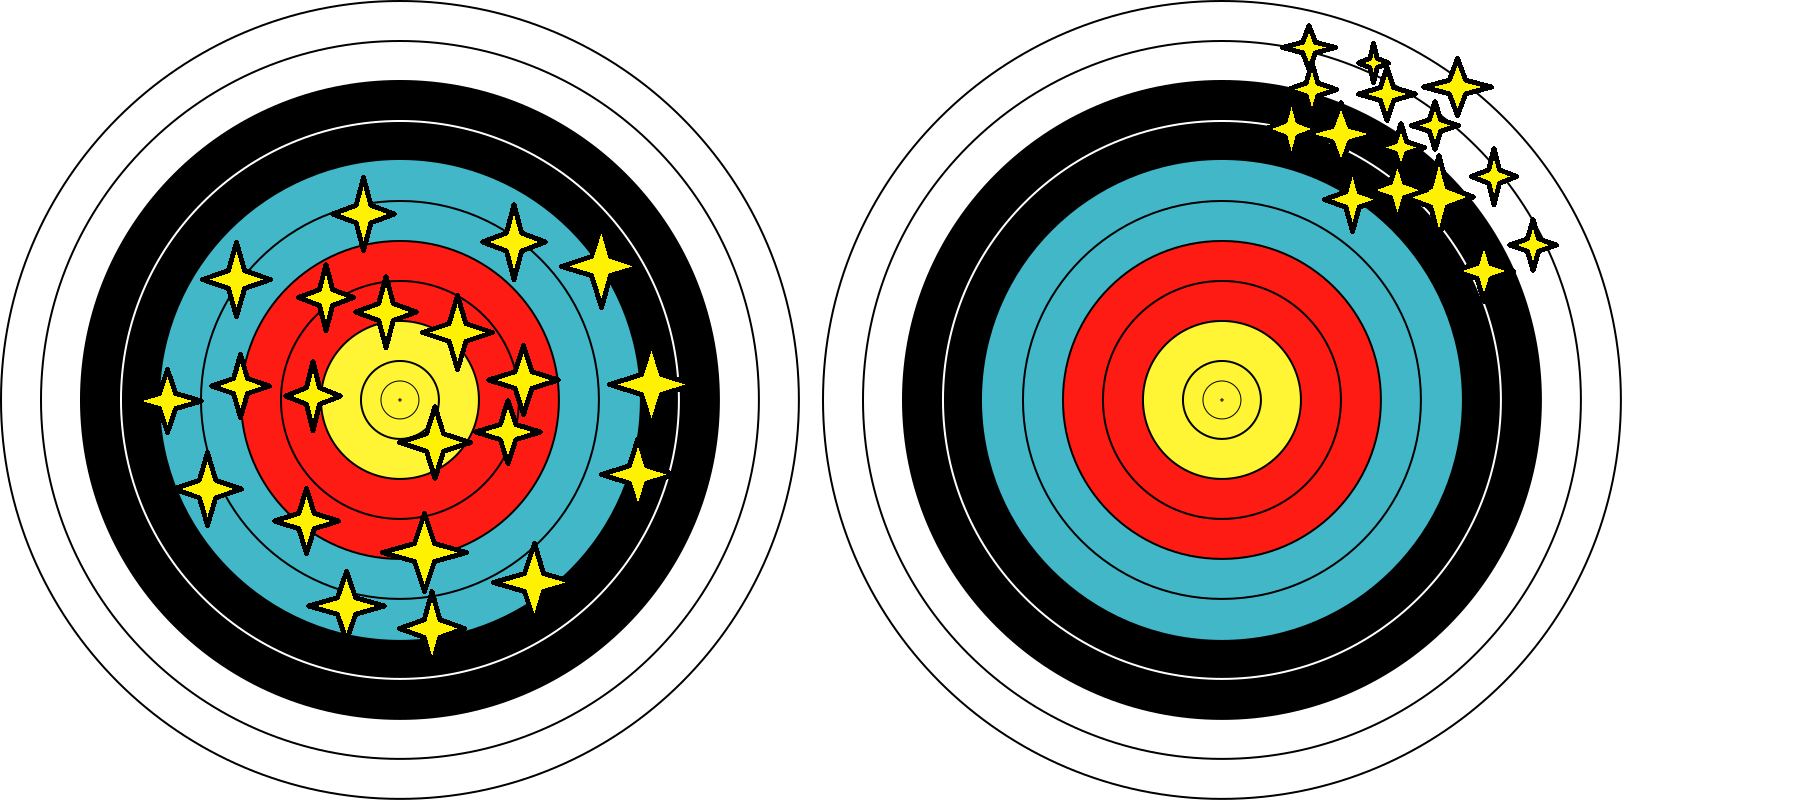

<div>
<img src="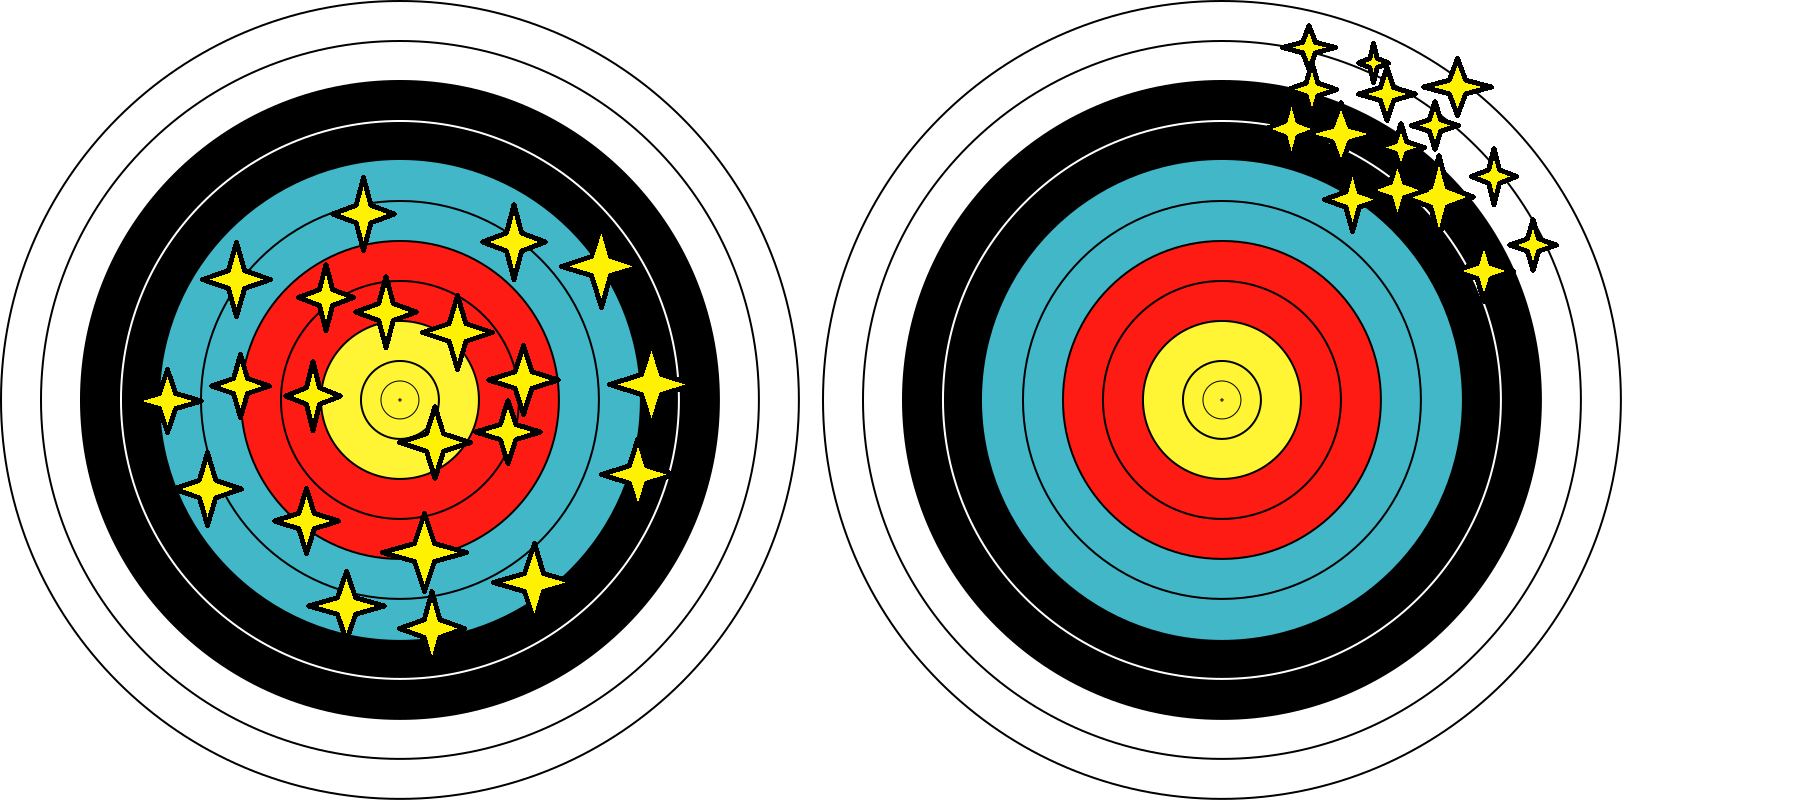" width="500"/>
</div>

El sesgo se define, entonces como $B(T_n)=E(T_n)-\theta$. Entonces, cuando $n \rightarrow \infty$, el estimador convergerá hacia su valor real.

¿Cómo probar el insesgamiento del estimador?

Para calcular el sesgo vamos a hacer uso de un proceso llamado remuestreo. Usaremos los ingresos (`Revenue`) para esto, lo extraeremos del objeto `m_ventas` y lo denominaremos `muestra`:

In [ ]:
print(head(m_ventas))

In [ ]:
muestra <- m_ventas$Revenue

Y vamos a calcular algunas medidas necesarias:

In [ ]:
n <- length(muestra)
varmedia <- (1/(n^2)) * sum((muestra - mean(muestra))^2)
# Alternativamente: varmedia <- var(muestra)/n
desvmedia <- sqrt(varmedia)

In [ ]:
varmedia

In [ ]:
desvmedia

In [ ]:
length(muestra)

Y procedemos al remuestreo

In [ ]:
# Remuestreo
B <- 1e+04
media <- numeric(B)
mediana <- numeric(B)
for (k in 1:B) {
    remuestra <- sample(muestra, n, replace = TRUE)
    media[k] <- mean(remuestra)
    # remordenada <- sort(remuestra)
    # mediana[k] <- remordenada[8]
    mediana[k] <- median(remuestra)
}

Y calculamos el sesgo

In [ ]:
sesgomediaboot <- mean(media) - mean(muestra)
sesgomedianaboot <- mean(mediana) - median(muestra)

In [ ]:
sesgomediaboot

In [ ]:
sesgomedianaboot

In [ ]:
mean(media)

In [ ]:
mean(mediana)

Otra opción

In [ ]:
library(boot)

In [ ]:
statistic <- function(data, i){
  remuestra <- data[i]
  c(mean(remuestra), median(remuestra))
}

set.seed(1)
res.boot <- boot(muestra, statistic, R = B)
res.boot

In [ ]:
mean(df.ventas$Revenue)

<h3> Consistencia </h3>

La consistencia es otra característica de los estimadores puntuales. En pocas palabras, se dice que un estimador es consistente si a medida que el tamaño de muestra crece, el estimador se va “pareciendo” más al parámetro. Otros tipos de consistencia están relacionados con convergencias a distribuciones normales, es decir con que cuando el tamaño de muestra es grande, la distribución del estimador tiende a ser normal:

In [ ]:
muestra_1<- sample(1:nrow(df.ventas),size=10,replace=FALSE)
m_ventas_1 <- df.ventas[muestra_1,]

muestra_2<- sample(1:nrow(df.ventas),size=100,replace=FALSE)
m_ventas_2 <- df.ventas[muestra_2,]

muestra_3<- sample(1:nrow(df.ventas),size=1000,replace=FALSE)
m_ventas_3 <- df.ventas[muestra_3,]

In [ ]:
multiplot(
    ggplot(data = df.ventas, aes(x = Revenue)) + geom_histogram(bins = 50) + theme_test() + ggtitle('Población') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    ggplot(data = m_ventas_1, aes(x = Revenue)) + geom_histogram(bins = 50) + theme_test() + ggtitle('n = 10') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    ggplot(data = m_ventas_2, aes(x = Revenue)) + geom_histogram(bins = 50) + theme_test() + ggtitle('n = 100') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    ggplot(data = m_ventas_3, aes(x = Revenue)) + geom_histogram(bins = 50) + theme_test() + ggtitle('n = 1000') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    cols = 2)

In [ ]:
# Remuestreo
B <- 1e+02
media100 <- numeric(B)
mediana100 <- numeric(B)
for (k in 1:B) {
    remuestra <- sample(muestra, n, replace = TRUE)
    media100[k] <- mean(remuestra)
    mediana100[k] <- median(remuestra)
}

B <- 1e+03
media1000 <- numeric(B)
mediana1000 <- numeric(B)
for (k in 1:B) {
    remuestra <- sample(muestra, n, replace = TRUE)
    media1000[k] <- mean(remuestra)
    mediana1000[k] <- median(remuestra)
}

B <- 1e+04
media10000 <- numeric(B)
mediana10000 <- numeric(B)
for (k in 1:B) {
    remuestra <- sample(muestra, n, replace = TRUE)
    media10000[k] <- mean(remuestra)
    mediana10000[k] <- median(remuestra)
}

In [ ]:
df100 <- data.frame(media100, mediana100)
df1000 <- data.frame(media1000, mediana1000)
df10000 <- data.frame(media10000, mediana10000)

In [ ]:
multiplot(
    ggplot(data = df100, aes(x = media100)) + geom_histogram(bins = 50) + theme_test() + ggtitle('media de 100') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    ggplot(data = df1000, aes(x = media1000)) + geom_histogram(bins = 50) + theme_test() + ggtitle('media de 1000') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    ggplot(data = df10000, aes(x = media10000)) + geom_histogram(bins = 50) + theme_test() + ggtitle('media de 10000') +
    theme(axis.title.x = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.y = element_text(size = 14),
      strip.text = element_text(size = 14),
      legend.position = 'none'),
    cols = 3)

<h3> Suficiencia </h3>

La suficiencia es un concepto difícil de explicar sin una definción formal. En forma sencilla, se dice que una medida es suficiente si conserva la información sobre el parámetro que tiene la muestra.

<h3> Eficiencia </h3>

El criterio de varianza mínima está relacionado con la precisión de un estimador, de tal forma que un estimador $T_{n1}$ es más preciso que $T_{n2}$ cuando la variabilidad de $T_{n1}$ es menor que la de $T_{n2}$ ($V( T_{n1})<V( T_{n2}) $).

In [ ]:
var(media)

In [ ]:
var(mediana)

<h2> Métodos de Estimación Puntal </h2>

Existen diferentes métodos para encontrar los estimadoresde un parámetro determinado que van desde la simple analogía hasta las funciones de verosimilitud. Veamos algunos.

<h3> Por Analogía </h3>

Es el método más sencillo, consiste en asignar como estimado la medida estadística que cumple la misma función que el parámetro pobacional:

$$
\begin{align*}
\mu & \rightarrow \bar{X} = \frac{\sum_{i}X_{i}}{n} \\
\sigma^{2} & \rightarrow s_{x}^{2} = \frac{\sum_{i}(X_{i} - \bar{X})^{2}}{n-1} \\
\sigma & \rightarrow s_{x} = \sqrt{\frac{\sum_{i}(X_{i} - \bar{X})^{2}}{n-1}} \\
\pi & \rightarrow p = \frac{num.exitos}{n}
\end{align*}
$$


In [ ]:
mean(m_ventas$Revenue)

In [ ]:
var(m_ventas$Revenue)

In [ ]:
sd(m_ventas$Revenue)

In [ ]:
print(data.frame(prop.table(table(m_ventas$Country))))

In [ ]:
print(data.frame(prop.table(table(m_ventas$Country)))[7,])

<h3> Estimación por Máxima Verosimilitud </h3>

Consideremos los siguiente: $x_{1}, x_{2}, \dots, x_{n}$ corresponde a una m.a.s. de una población $X$ con una distribución de probabilidad $f(x|\theta)$ siendo $\theta$ un parámetro desconocido. Entonces, la función de verosimilitud se define como:


$${\Large
L(\theta) = f \left(x_{1}, x_{2}, \dots, x_{n}|\theta\right)
}$$


Como cada $x_{i}$ corresponde a una realización de la v.a. $X_{i}$ y son independientes e identicamente distribuidas (_idd_) la función de verosimilitud se escribe:

$$
{\large
L(\theta) = \prod_{i=1}^{n}f(x_{i}|\theta)
}
$$

La teoría nos indica que para encontrar el estimador máximo verosímil (_EMV_) para el parámetro poblacional desconocido $\theta$, debemos resolver el siguiente problema de maximización:

$$
{\large
\underset{\widehat{\theta}}{max} \; L(\theta) \text{ o bien } \underset{\widehat{\theta}}{max}\; ln\, L(\theta)
}
$$

Computacionalmente, el problema consiste en minimizar el negativo de la función de log-verisimilitud ya que $max\;Z = min\;(-Z)$ siendo $Z$ una función cualquiera. Entonces, se tiene:

$$
{\large
- ln\, L(\theta) = - ln \prod_{i=1}^{n} f\left( x_{i}|\theta\right) = - \sum_{i=1}^{n} ln\, f\left( x_{i}|\theta\right)
}
$$

Sigamos con el ejemplo de las edades y estimemos por _MV_ los parámetros.

Podemos usar dos funciones (no necesariamente ambas) `mle` y `mle2`. Cabe la posibildad que alguna librería no se encuentre actualizada

Primero, necesitamos instalar algunos paquetes:

In [ ]:
#install.packages('bbmle')

In [ ]:
library(stats4) # para la función mle
library(bbmle) # para la función mle2

Ahora construimos el negativo de la función de log-verosimilitud. Esta función, llamada `NegLogLik` en este caso, depende de los parámetros poblacionales desconocidos media y desviación estándar, $\mu$ y $\sigma$ respectivamente:

In [ ]:
x <- m_ventas$Revenue # Para trabajar con los datos muestrales que requerimos
NegLogLik = function(mu,sigma){-sum(dnorm(x,mu,sigma,log = TRUE))}

Los parámetros muestrales para hacer las estimaciones

In [ ]:
m.mu<-mean(m_ventas$Revenue) # Media
m.sigma<-sd(m_ventas$Revenue)

Construimos los estimadores. El argumento `star=list()` es para ingresar los valores iniciales con los cuales R construirá numéricamente una aproximación de la Matriz Hessiana asociada al problema de optimización

In [ ]:
EMV1 = mle(NegLogLik, start = list(mu=m.mu, sigma=m.sigma))
summary(EMV1) # Para visualizar los valores

In [ ]:
EMV2 = mle2(NegLogLik,
            start = list(mu=m.mu,sigma=m.sigma),
            data = list(x)) # La otra función
summary(EMV2)

<h2> Estimadores </h2>

Los parámetros a estimar, básicamente, son dos: media y varianza.

Si la muestra es representativa, la media y la varianza poblacionales corresponderán a la media y varianza muestrales. Por lo que los valores encontrados corresponderán a una probabilidad.

La función de la media poblacional es:

$$
{\large
\mu = \frac{\sum_{i=1}^{N} X_{i}}{N}
}
$$

y la muestral es:

$$
{\large
\overline{x} = \frac{\sum_{i=1}^{n} x_{i}}{n}
}
$$

Básicamente, se calculan de la misma manera.

Cuando se calcula la varianza, sí se observa una diferencia sustancial:

Varianza Poblacional:

$$
{\large
\sigma^{2} = \frac{\sum_{i=1}^{N} \left( X_{i} - \mu \right)^{2}}{N}
}
$$

Varianza Muestral

$$
{\large
S^{2} = \frac{\sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2}}{n-1}
}
$$

Vamos a continuar con el ejemplo de las ventas Como ya conocemos la población (asumimos el objeto `df.ventas` como población), vamos a usarlo como referencia para comprobar la precisión (vamos a reusar los objetos que teníamos previamente):

In [ ]:
ls()

In [ ]:
dim(df.ventas)
dim(m_ventas)

In [ ]:
# Media Poblacional
round(mean(df.ventas$Revenue),5)

In [ ]:
# Media Muestral
round(mean(m_ventas$Revenue),5)

Ahora, calculemos la varianza. Tengamos en cuenta que estos parámetros no son equivalentes:

$$
\frac{\sum_{i=1}^{N} \left( X_{i} - \mu \right)^{2}}{N} \not\equiv \frac{\sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2}}{n-1}
$$

Debemos tener en cuenta que las funciones de los paquetes estadísticos, por defecto, calculan la varianza muestral; por lo tanto, debemos hacer la respectiva corrección $\left(N-1\right) / N$

In [ ]:
N<-nrow(df.ventas) # El tamaño de la población
round(var(df.ventas$Revenue),5) # Varianza sin corrección

In [ ]:
round(var(df.ventas$Revenue)*((N-1)/N),5) # Varianza Corregida

También podemos usar una función específica `popvar` de la librería `rafalib`:

In [ ]:
#install.packages('rafalib') # Si no se encuentra instalada
library(rafalib)

In [ ]:
round(popvar(df.ventas$Revenue),5)

In [ ]:
# Y la respectiva desviación Estándar
round((sqrt(popvar(df.ventas$Revenue))),5)

Para la varianza muestral no requerimos ajustes:

In [ ]:
round(var(m_ventas$Revenue),5)

In [ ]:
round(sd(m_ventas$Revenue),5)

<h2> Estimación por Intervalos (Intervalos de Confianza o Tolerancia) </h2>

El intervalo de confianza describe la variabilidad entre la medida obtenida en un estudio y la medida real de la población (el valor real). Corresponde a un rango de valores, cuya distribución es normal y en el cual se encuentra, con alta probabilidad, el valor real de una determinada variable.

Se trata de un par de números (o varios pares de números) dentro de los cuales se estima se encuentra un parámetro desconocido $\theta$.

Cuando la varianza $\sigma^{2}$ es conocida, el intervalo de confianza corresponde a:

$$
{\large
I.C \rightarrow \mu \in \overline{x} \pm Z_{(1-\alpha)} \frac{S_{x}}{\sqrt{n}}
}
$$

Donde

* $1-\alpha$ es el nivel de confianza deseado
* $Z_{1-\alpha}$ es el valor de la distribución normal estándar que corresponde al nivel de confianza deseado.
* $\frac{S_{x}}{\sqrt{n}}$ es el error estándar de la media

Los niveles de confianza más comunes son:

* 0.90 o 90% $\rightarrow Z = 1.64$
* 0.95 o 95% $\rightarrow Z = 1.96$
* 0.99 o 99% $\rightarrow Z = 2.57$

Por ejemplo:

In [ ]:
levelconf <- 0.95
alpha2 <- (1-levelconf)/2
zeta <- qnorm(1-alpha2)
print(
paste0('El valor de Z para un nivel de confianza de ',100*levelconf,'% es de :', round(zeta,2))
)

Veamos la gráfica de la Ditribución $Z$ o Normal Estándar:

In [ ]:
# La gráfica de la distribución normal estándar
# install.packages('RcmdrMisc') # Si no está intalada la librería

In [ ]:
library(RcmdrMisc)

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
x <- seq(-3, 3, length.out=1000)  
plotDistr(x, dnorm(x, mean=0, sd=1), cdf=FALSE, xlab="x", ylab="Density", main=paste("Distribución Normal Estándar"), 
 regions=list(c(-1.96, 1.96)), col=c('#BEBEBE', '#BEBEBE'), legend.pos='topright')

Sigamos con el ejemplo de los graduados:

In [ ]:
# Primero los descriptivos básicos:
summary(muestra)

In [ ]:
hist(muestra, breaks = 50)

In [ ]:
round(sd(muestra),2)

Ahora, calculemos el intervalo de modo manual:

In [ ]:
# Si suponemos que conocemos la varianza
media <- mean(muestra) # Pedimos la media
desv <- sd(muestra) # La desviación estándar
N <- length(muestra) # El tamaño válido de la muestra
error.est <- desv/sqrt(N) # Calculamos el error estándar
error <- 1.96*error.est # Fijamos Z=1.96 para indicar un nivel de confianza de 95%
lim.inf <- media-error # Límite inferior del intervalo
lim.sup <- media+error # Límite superior del intervalo

In [ ]:
resultado1 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
print(round(t(resultado1),1))

La afirmación se puede hacer de la siguiente manera:

In [ ]:
print(
    paste0('Con un nivel de confianza de 95%, la media poblacional para el nivel de ventas se encuentra entre ',
           round(lim.inf,2),' y ', round(lim.sup,2)))

Y, el valor real de la media es:

In [ ]:
round(mean(df.ventas$Revenue),2)

Otra forma de estimar el intervalo de confianza es mediante la función `z.test` de la librería `TeachingDemos` que, a la vez, nos sirve para determinar si el valor de la media es el correcto:

In [ ]:
#install.packages('TeachingDemos') # Si no está instalada
library(TeachingDemos) # Para usar la función z.test()

In [ ]:
args(z.test)

In [ ]:
z.test(muestra, stdev = sd(muestra))

Un parámetro que, por lo general, se desconoce es la varianza. Cuando esto ocurre, no se emplea la distribucion _Z_ sino la distribución _t-student_:

$$
I.C \rightarrow \mu \in \overline{x} \pm t \frac{S_{x}}{\sqrt{n}}
$$

In [ ]:
# La Gráfica de la distribución t-student:
curve(dt(x, df = 30), from = -3, to = 3, lwd = 3, ylab = "y", main = "Distribución t-student")
ind <- c(1, 2, 3, 5, 10)
for (i in ind) curve(dt(x, df = i), -3, 3, add = TRUE,col=i)

In [ ]:
## Como es el caso real, desconocemos la varianza
media <- mean(muestra)
desv <- sd(muestra)
N <- length(muestra)
error.est <- desv/sqrt(N)
error <- qt(0.975, df= N-1) * error.est # Usar el cuantil 0.975 de t
lim.inf <- media-error
lim.sup <- media+error

In [ ]:
qt(0.975, df= N-1)

In [ ]:
resultado2 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
print(round(t(resultado2),1))

O usando la función `t.test`:

In [ ]:
t.test(muestra, mu = mean(df.ventas$Revenue), conf.level = 0.95)

Cuando se trata de proporciones, el intervalo de confianza se estima mediante:

$$
I.C. \rightarrow \pi \in p \pm Z \sqrt{\frac{p (1 - p)}{n}}
$$

Y una librería que nos ayuda en el cálculo de las frecuencias es `descr`

In [ ]:
#install.packages('descr') # Si no está instalada
library(descr)

In [ ]:
print(head(m_ventas))

In [ ]:
options('defoult')
print(freq(m_ventas$Country, plot = T))

In [ ]:
ggplot(data = m_ventas, aes(x = Country)) + geom_bar(stat = 'count') +
  geom_text(stat='count', aes(label=..count..), vjust=-1, size = 5) +
  labs(x = '', y = '') +
theme(axis.text = element_text(size = 14))

Preparamos los datos para el cálculo del intervalo de confianza, en este caso vamos a seleccionar una categoría: `USA` en la distribución de `Country`:

In [ ]:
cat <- ifelse(m_ventas$Country=="USA",'USA', 'Others')
round(prop.table(table(cat))*100,1)

In [ ]:
cat2 <- ifelse(m_ventas$Country=="USA", 1, 0)
p <- mean(cat2)
paste0("Prop. USA: ", round(p*100,1),"%")
paste0("Prop. Others: ", round((1-p)*100,1),"%")

In [ ]:
n <- length(cat2) # Tamaño de la muestra 
error.est.p <- sqrt((p*(1-p))/n) # Error estándar de la propoción
error.p <- 1.96 * error.est.p # Usamos Z = 1.96 para indicar un nivel de confianza del 95%
lim.inf.p <- p - error.p 
lim.sup.p <- p + error.p

In [ ]:
result.p <- data.frame(p, n, error.est.p, error.p, lim.inf.p, lim.sup.p)
print(round(t(result.p),3))

O usando la función `binconf` de la librería `Hmisc`:

In [ ]:
# install.packages('Hmisc')
library(Hmisc) # Viene en las librerías base

In [ ]:
args(binconf)

In [ ]:
print(binconf(x = nrow(m_ventas[m_ventas$Country=="USA",]),
        n = nrow(m_ventas), alpha = 0.05))

Gráficamente, ¿cómo lo podemos representar? Una opción es las gráficas de error

In [ ]:
# install.packages('plotrix') # Si no está instalada
library(plotrix)

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
plotCI(mean(m_ventas$Revenue),
ui = lim.sup, li = lim.inf,
xlab = 'Ventas', ylab = 'Intervalo de Confianza', pch = 19)

<h3> Intervalos de Confianza para la varianza </h3>

La varianza es un parámetro no negativo, por lo que utilizar una distribución normal ($Z$ o $t$) no es lo más adecuado. Para el intervalo de confianza de la varianza vamos a apoyarnos en la distribución $\chi^{2}$:

$$
\chi^{2}_{n-1} = \sum_{i=1}^{n} \frac{(X_{}i - \bar{X})^{2}}{\sigma^{2}} = \frac{(n-1)\hat{S}^{2}}{\sigma^2} \rightarrow \chi^{2}_{n-1}
$$

La probabilidad está definida por:

$$
P\left[ \chi^{2}_{n-1,\alpha/2} \leq \chi^{2}_{n-1} \leq \chi^{2}_{n-1,1-\alpha/2} \right] = 1 - \alpha
$$

Y tiene la siguiente forma:

In [ ]:
#devtools::install_github("strengejacke/sjPlot") # si no está intalada
library("sjPlot")

In [ ]:
dist_chisq(chi2 = 10, deg.f = 10)

El intervalo de confianza que necesitamos encontrar es:

$$
\sigma^{2} \in \left[ \frac{(n-1)\hat{S}^{2}}{\chi{2}_{n-1,1-\alpha/2}} \quad , \quad \frac{(n-1)\hat{S}^{2}}{\chi{2}_{n-1,1-\alpha/2}} \right]
$$

Para construir intervalos de confianza para la varianza se usa la función `var.test` del paquete `stests` disponible en el repositorio GitHub.

In [ ]:
#devtools::install_github('fhernanb/stests', force=TRUE) # Si no está instalada
library(stests)

In [ ]:
levelconf <- 0.95
res <- var.test(x=muestra, conf.level = levelconf)
print(paste0('El intervalo de confianza (', levelconf,') para la varianza se encuentra entre: ', round(res$conf.int,2)[1],
             ' y ', round(res$conf.int,2)[2]))